<a href="https://colab.research.google.com/github/npr99/IN-CORE_notebooks/blob/main/IN_CORE_CommunityDescription_Galveston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lumberton Testbed - Initial Interdependent Community Description

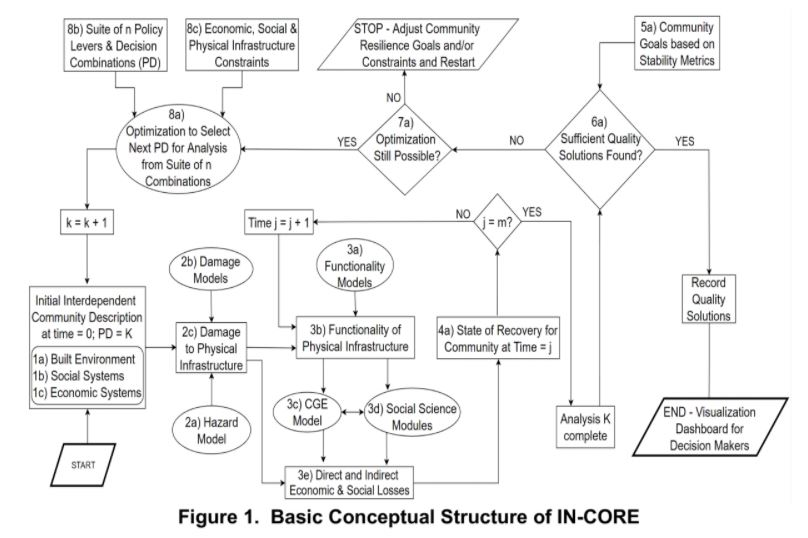

# Basic Conceptual Structure of IN-CORE
Step 1 in IN-CORE is to establish initial interdependent community description at time 0 and with policy levers and decision combinations set to K (baseline case). 
The community description includes three parts - the built environment, social systems, and economic systems. 
This notebook helps explore the data currently available in IN-CORE for the Lumberton Testbed.

In [1]:
import pandas as pd
import geopandas as gpd # For reading in shapefiles
import numpy as np
import sys # For displaying package versions
import os # For managing directories and file paths if drive is mounted

from pyincore import IncoreClient, Dataset, FragilityService, MappingSet, DataService
from pyincore.analyses.buildingdamage.buildingdamage import BuildingDamage

from pyincore_viz.geoutil import GeoUtil as viz


In [2]:
# Functions for visualizing the population data results as tables
from pyincore_viz.analysis.popresultstable import PopResultsTable as poptable

In [3]:
# Check package versions - good practice for replication
print("Python Version ",sys.version)
print("pandas version: ", pd.__version__)
print("numpy version: ", np.__version__)

Python Version  3.8.12 | packaged by conda-forge | (default, Oct 12 2021, 21:22:46) [MSC v.1916 64 bit (AMD64)]
pandas version:  1.4.0
numpy version:  1.22.2


In [4]:
# Check working directory - good practice for relative path access
os.getcwd()

'g:\\Shared drives\\HRRC_IN-CORE\\Tasks\\P4.9 Testebeds\\LumbertonBuyout_HUA\\WorkNPR'

In [5]:
client = IncoreClient()
# IN-CORE chaches files on the local machine, it might be necessary to clear the memory
#client.clear_cache() 

Connection successful to IN-CORE services. pyIncore version detected: 1.3.0


In [6]:
# create data_service object for loading files
data_service = DataService(client)

## 1a) Built environment: Building Inventory

In [7]:
# Building inventory
bldg_inv_id = "6036c2a9e379f22e1658d451"
# load building inventory
bldg_inv = Dataset.from_data_service(bldg_inv_id, data_service)
filename = bldg_inv.get_file_path('shp')
print("The IN-CORE Dataservice has saved the Building Inventory on your local machine: "+filename)

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
The IN-CORE Dataservice has saved the Building Inventory on your local machine: C:\Users\nathanael99\.incore\cache_data\6036c2a9e379f22e1658d451\lumberton_building_inventory_w_strcid\lumberton_building_inventory_w_strcid.shp


In [8]:
bldg_inv_gdf = gpd.read_file(filename)
bldg_inv_gdf.crs = {'init': 'epsg:4326'}
bldg_inv_gdf.head()

C:\Users\nathanael99\Miniconda3\envs\pyincoreEnv20220211\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,guid,strctid,ffe_elev,archetype,parid,struct_typ,no_stories,a_stories,b_stories,bsmt_type,...,dwell_unit,str_typ2,occ_typ2,appr_bldg,appr_land,appr_tot,year_built,lhsm_elev,g_elev,geometry
0,efd13166-d7a0-476b-ada5-c55cea1f0184,STefd13166-d7a0-476b-ada5-c55cea1f0184,41.41049,1,3715514603,None,1,0,0,None,...,0,None,None,0,0,0,1988,0.0,40.2336,POINT (-79.08926 34.55354)
1,66352d95-70cb-46cb-8904-576f3ee3e9d3,ST66352d95-70cb-46cb-8904-576f3ee3e9d3,43.86419,2,3715516008,None,1,0,0,None,...,0,None,None,0,0,0,1985,0.0,42.9768,POINT (-79.08488 34.56072)
2,a4fb314f-0e00-4bf1-9651-d8ecaa4b14d8,STa4fb314f-0e00-4bf1-9651-d8ecaa4b14d8,40.84585,2,3715514607,None,1,0,0,None,...,0,None,None,0,0,0,1988,0.0,39.9288,POINT (-79.08826 34.55475)
3,e433891c-aa7a-47b0-a6aa-1b0895a65908,STe433891c-aa7a-47b0-a6aa-1b0895a65908,40.90913,2,3715514606,None,1,0,0,None,...,0,None,None,0,0,0,1988,0.0,39.9288,POINT (-79.08842 34.55446)
4,7afe36f4-fb23-43c6-b1f9-3e6d3209dcbc,ST7afe36f4-fb23-43c6-b1f9-3e6d3209dcbc,40.69086,1,3715514605,None,1,0,0,None,...,0,None,None,0,0,0,1988,0.0,39.6240,POINT (-79.08862 34.55423)


In [9]:
bldg_inv_gdf.columns

Index(['guid', 'strctid', 'ffe_elev', 'archetype', 'parid', 'struct_typ',
       'no_stories', 'a_stories', 'b_stories', 'bsmt_type', 'sq_foot',
       'gsq_foot', 'occ_type', 'occ_detail', 'major_occ', 'broad_occ',
       'repl_cst', 'str_cst', 'nstra_cst', 'nstrd_cst', 'dgn_lvl', 'cont_val',
       'efacility', 'dwell_unit', 'str_typ2', 'occ_typ2', 'appr_bldg',
       'appr_land', 'appr_tot', 'year_built', 'lhsm_elev', 'g_elev',
       'geometry'],
      dtype='object')

In [10]:
bldg_inv_gdf[['guid','strctid','archetype','appr_bldg','year_built','g_elev','lhsm_elev']].head()

,guid,strctid,archetype,appr_bldg,year_built,g_elev,lhsm_elev
0,efd13166-d7a0-476b-ada5-c55cea1f0184,STefd13166-d7a0-476b-ada5-c55cea1f0184,1,0,1988,40.2336,0.0
1,66352d95-70cb-46cb-8904-576f3ee3e9d3,ST66352d95-70cb-46cb-8904-576f3ee3e9d3,2,0,1985,42.9768,0.0
2,a4fb314f-0e00-4bf1-9651-d8ecaa4b14d8,STa4fb314f-0e00-4bf1-9651-d8ecaa4b14d8,2,0,1988,39.9288,0.0
3,e433891c-aa7a-47b0-a6aa-1b0895a65908,STe433891c-aa7a-47b0-a6aa-1b0895a65908,2,0,1988,39.9288,0.0
4,7afe36f4-fb23-43c6-b1f9-3e6d3209dcbc,ST7afe36f4-fb23-43c6-b1f9-3e6d3209dcbc,1,0,1988,39.6240,0.0


In [11]:
bldg_inv_gdf[['guid','strctid','archetype','appr_bldg','year_built','g_elev','lhsm_elev']].count()

guid          20091
strctid       20091
archetype     20091
appr_bldg     20091
year_built    20091
g_elev        20091
lhsm_elev     20091
dtype: int64

In [12]:
bldg_inv_gdf[['guid','strctid','archetype','appr_bldg','year_built','g_elev','lhsm_elev']].groupby('archetype').count()

,guid,strctid,appr_bldg,year_built,g_elev,lhsm_elev
archetype,,,,,,
0,25,25,25,25,25,25
1,6070,6070,6070,6070,6070,6070
2,10273,10273,10273,10273,10273,10273
3,249,249,249,249,249,249
4,1391,1391,1391,1391,1391,1391
5,1060,1060,1060,1060,1060,1060
6,9,9,9,9,9,9
7,10,10,10,10,10,10
8,14,14,14,14,14,14


In [13]:
bldg_inv_gdf[['appr_bldg','year_built','g_elev','lhsm_elev']].describe().T

,count,mean,std,min,25%,50%,75%,max
appr_bldg,20091.0,0.000000,0.000000,0.00,0.0000,0.0000,0.0000,0.0000
year_built,20091.0,1973.188194,79.571552,0.00,1971.0000,1982.0000,1983.0000,1988.0000
g_elev,20091.0,41.670883,3.838544,30.48,39.3192,41.7576,44.5008,50.5968
lhsm_elev,20091.0,0.000000,0.000000,0.00,0.0000,0.0000,0.0000,0.0000


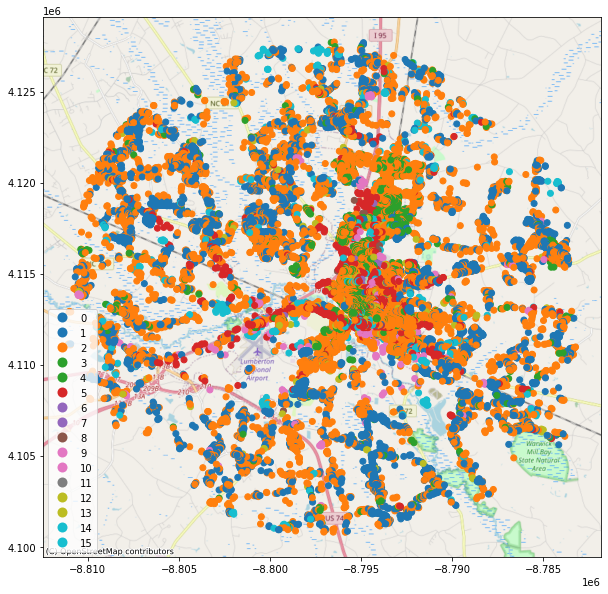

In [14]:
map = viz.plot_gdf_map(bldg_inv_gdf,column='archetype',category=True)
map

## 1b) Social Systems: Housing Unit Inventory

For more information see:
>Rosenheim, Nathanael, Roberto Guidotti, Paolo Gardoni & Walter Gillis Peacock. (2019). Integration of detailed household and housing unit characteristic data with critical infrastructure for post-hazard resilience modeling. Sustainable and Resilient Infrastructure. doi.org/10.1080/23789689.2019.1681821


>Rosenheim, Nathanael (2021) “Detailed Household and Housing Unit Characteristics: Alpha Release of Housing Unit Inventories.” DesignSafe-CI. https://doi.org/10.17603/ds2-jwf6-s535.

In [15]:
# Housing Unit inventory
housing_unit_inv_id = "61d778a14b896661e24989ed"
# load housing unit inventory as pandas dataframe
housing_unit_inv = Dataset.from_data_service(housing_unit_inv_id, data_service)
filename = housing_unit_inv.get_file_path('csv')
print("The IN-CORE Dataservice has saved the Housing Unit Inventory on your local machine: "+filename)

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
The IN-CORE Dataservice has saved the Housing Unit Inventory on your local machine: C:\Users\nathanael99\.incore\cache_data\61d778a14b896661e24989ed\hui_v0-1-0_Lumberton_NC_2010_rs9876\hui_v0-1-0_Lumberton_NC_2010_rs9876.csv


In [16]:
housing_unit_inv_df = pd.read_csv(filename, header="infer")
housing_unit_inv_df.head()

,huid,blockid,tractid,bgid,FIPScounty,numprec,ownershp,race,hispan,vacancy,gqtype,incomegroup,randincome,hhinc
0,B371559601011003H001,371559601011003,37155960101,371559601011,37155,1,1.0,1.0,0.0,0.0,0.0,9.0,45550.0,3.0
1,B371559601011005H001,371559601011005,37155960101,371559601011,37155,1,1.0,1.0,0.0,0.0,0.0,1.0,6115.0,1.0
2,B371559601011006H001,371559601011006,37155960101,371559601011,37155,1,1.0,1.0,0.0,0.0,0.0,12.0,92799.0,4.0
3,B371559601011006H002,371559601011006,37155960101,371559601011,37155,1,1.0,1.0,0.0,0.0,0.0,6.0,33058.0,3.0
4,B371559601011007H006,371559601011007,37155960101,371559601011,37155,1,2.0,1.0,0.0,0.0,0.0,7.0,36896.0,3.0


In [17]:
housing_unit_inv_df.columns

Index(['huid', 'blockid', 'tractid', 'bgid', 'FIPScounty', 'numprec',
       'ownershp', 'race', 'hispan', 'vacancy', 'gqtype', 'incomegroup',
       'randincome', 'hhinc'],
      dtype='object')

### Explore Housing Unit Characteristics
The housing unit inventory includes characteristics based on the 2010 Decennial Census. 

In [18]:
poptable.pop_results_table(housing_unit_inv_df, where = "Robeson County NC")

hispan,0.000000,1.000000,
race,,,
1.000000,"15,376",613,"15,989"
2.000000,"11,537",86,"11,623"
3.000000,"17,743",162,"17,905"
4.000000,258,3,261
5.000000,12,6,18
6.000000,37,"1,489","1,526"
7.000000,520,155,675
Total,"45,483","2,514","47,997"


In [19]:
poptable.pop_results_table(housing_unit_inv_df, 
                  who = "Total Population by Householder", 
                  what = "by Race, Ethnicity",
                  where = "Robeson County NC",
                  when = "2010",
                  row_index = "Race Ethnicity",
                  col_index = 'Tenure Status')

Tenure Status,1 Owner Occupied (%),2 Renter Occupied (%),Total Population by Householder (%)
Race Ethnicity,,,
"1 White alone, Not Hispanic","26,713 (31.6%)","9,641 (21.7%)","36,354 (28.2%)"
"2 Black alone, Not Hispanic","15,809 (18.7%)","14,587 (32.8%)","30,396 (23.5%)"
"3 American Indian and Alaska Native alone, Not Hispanic","36,921 (43.6%)","12,916 (29.1%)","49,837 (38.6%)"
"4 Asian alone, Not Hispanic",366 (0.4%),497 (1.1%),863 (0.7%)
"5 Other Race, Not Hispanic",874 (1.0%),742 (1.7%),"1,616 (1.3%)"
"6 Any Race, Hispanic","3,979 (4.7%)","6,049 (13.6%)","10,028 (7.8%)"
Total,"84,662 (100.0%)","44,432 (100.0%)","129,094 (100.0%)"


## 1a + 1b) Interdependent Community Description

Explore building inventory and social systems. Specifically look at how the building inventory connects with the housing unit inventory using the housing unit allocation.
The housing unit allocation method will provide detail demographic characteristics for the community allocated to each structure.

To run the HUA Algorithm, three input datasets are required:

1. Housing Unit Inventory - Based on 2010 US Census Block Level Data

2. Address Point Inventory - A list of all possible residential/business address points in a community. Address points are the link between buildings and housing units.

3. Building Inventory - A list of all buildings within a community.


### Set Up and Run Housing Unit Allocation

The bulding and housing unit inventories have already by loaded. The address point inventory is needed to link the population with the structures.

In [20]:
# Housing unit and Building Inventories have been loaded
address_point_inv_id = "60aac382088dfa3b65030b16"

In [21]:
from pyincore.analyses.housingunitallocation import HousingUnitAllocation

# Create housing allocation 
hua = HousingUnitAllocation(client)

# Load input dataset
hua.load_remote_input_dataset("housing_unit_inventory", housing_unit_inv_id)
hua.load_remote_input_dataset("address_point_inventory", address_point_inv_id)
hua.load_remote_input_dataset("buildings", bldg_inv_id)

# Specify the result name
result_name = "Lumberton_HUA"

seed = 1238
iterations = 1

# Set analysis parameters
hua.set_parameter("result_name", result_name)
hua.set_parameter("seed", seed)
hua.set_parameter("iterations", iterations)

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...


True

In [22]:
# Run Housing unit allocation analysis
hua.run_analysis()

True

### Explore results from Housing Unit Allocation

In [23]:
# Retrieve result dataset
hua_result = hua.get_output_dataset("result")

# Convert dataset to Pandas DataFrame
hua_df = hua_result.get_dataframe_from_csv(low_memory=False)

# Display top 5 rows of output data
hua_df[['guid','numprec','incomegroup','geometry']].head()

,guid,numprec,incomegroup,geometry
0,NaN,2.0,4.0,NaN
1,NaN,1.0,9.0,NaN
2,NaN,3.0,4.0,NaN
3,NaN,2.0,12.0,NaN
4,NaN,1.0,1.0,NaN


In [24]:
hua_df.columns

Index(['addrptid', 'strctid', 'ffe_elev', 'archetype', 'parid', 'struct_typ',
       'no_stories', 'a_stories', 'b_stories', 'bsmt_type', 'sq_foot',
       'gsq_foot', 'occ_type', 'occ_detail', 'major_occ', 'broad_occ',
       'repl_cst', 'str_cst', 'nstra_cst', 'nstrd_cst', 'dgn_lvl', 'cont_val',
       'efacility', 'dwell_unit', 'str_typ2', 'occ_typ2', 'appr_bldg',
       'appr_land', 'appr_tot', 'year_built', 'lhsm_elev', 'g_elev', 'blockid',
       'blockidstr', 'plcname10', 'plcgeoid10', 'countyfp10', 'huestimate',
       'residential', 'bldgobs', 'flag_ap', 'x', 'y', 'guid', 'randomap',
       'randommergeorder', 'huid', 'tractid', 'bgid', 'FIPScounty', 'numprec',
       'ownershp', 'race', 'hispan', 'vacancy', 'gqtype', 'incomegroup',
       'randincome', 'hhinc', 'randomhu', 'aphumerge', 'geometry'],
      dtype='object')

In [25]:
# keep observations where the housing unit characteristics have been allocated to a structure.
hua_df = hua_df.loc[hua_df['aphumerge'] == 'both']

In [26]:
poptable.pop_results_table(hua_df.loc[hua_df['plcname10']=='Lumberton'].copy(), 
                  who = "Total Population by Householder", 
                  what = "by Race, Ethnicity",
                  where = "Lumberton NC",
                  when = "2010",
                  row_index = "Race Ethnicity",
                  col_index = 'Tenure Status')

Tenure Status,1 Owner Occupied (%),2 Renter Occupied (%),Total Population by Householder (%)
Race Ethnicity,,,
"1 White alone, Not Hispanic","5,599 (60.8%)","2,474 (23.8%)","8,073 (41.2%)"
"2 Black alone, Not Hispanic","2,104 (22.8%)","5,069 (48.7%)","7,173 (36.6%)"
"3 American Indian and Alaska Native alone, Not Hispanic",963 (10.5%),"1,412 (13.6%)","2,375 (12.1%)"
"4 Asian alone, Not Hispanic",214 (2.3%),275 (2.6%),489 (2.5%)
"5 Other Race, Not Hispanic",105 (1.1%),216 (2.1%),321 (1.6%)
"6 Any Race, Hispanic",225 (2.4%),955 (9.2%),"1,180 (6.0%)"
Total,"9,210 (100.0%)","10,401 (100.0%)","19,611 (100.0%)"


In [27]:
poptable.pop_results_table(hua_df, 
                  who = "Median Household Income", 
                  what = "by Race, Ethnicity",
                  where = "Robeson County NC",
                  when = "2010",
                  row_index = "Race Ethnicity",
                  col_index = 'Tenure Status')

Tenure Status,1 Owner Occupied,2 Renter Occupied,Median Household Income
Race Ethnicity,,,
"1 White alone, Not Hispanic","$41,457","$34,748","$39,886"
"2 Black alone, Not Hispanic","$25,456","$23,843","$24,735"
"3 American Indian and Alaska Native alone, Not Hispanic","$28,736","$28,201","$28,558"
"4 Asian alone, Not Hispanic","$39,669","$31,002","$34,978"
"5 Other Race, Not Hispanic","$32,487","$26,796","$29,533"
"6 Any Race, Hispanic","$24,414","$23,998","$24,291"
Total,"$31,309","$27,471","$29,946"


In [28]:
poptable.pop_results_table(hua_df.loc[hua_df['plcname10']=='Lumberton'].copy(), 
                   who = "Median Household Income", 
                  what = "by Race, Ethnicity",
                  where = "Lumberton NC",
                  when = "2010",
                  row_index = "Race Ethnicity",
                  col_index = 'Tenure Status')

Tenure Status,1 Owner Occupied,2 Renter Occupied,Median Household Income
Race Ethnicity,,,
"1 White alone, Not Hispanic","$44,494","$40,048","$42,876"
"2 Black alone, Not Hispanic","$25,112","$22,736","$23,636"
"3 American Indian and Alaska Native alone, Not Hispanic","$22,272","$23,732","$22,960"
"4 Asian alone, Not Hispanic","$46,656","$37,358","$39,515"
"5 Other Race, Not Hispanic","$29,242","$26,666","$26,680"
"6 Any Race, Hispanic","$25,057","$29,923","$28,712"
Total,"$37,902","$27,182","$31,410"


#### Validate the Housing Unit Allocation has worked
Notice that the population count totals for the community should match (pretty closely) data collected for the 2010 Decennial Census.
This can be confirmed by going to data.census.gov

Total Population by Race and Ethnicity:
https://data.census.gov/cedsci/table?q=DECENNIALPL2010.P5&g=0500000US37155&tid=DECENNIALSF12010.P5

Median Income by Race and Ethnicity:
- All Households: https://data.census.gov/cedsci/table?g=0500000US37155&tid=ACSDT5Y2012.B19013
- Black Households: https://data.census.gov/cedsci/table?g=0500000US37155&tid=ACSDT5Y2012.B19013B
- White, not Hispanic Households: https://data.census.gov/cedsci/table?g=0500000US37155&tid=ACSDT5Y2012.B19013H
- Hispanic Households: https://data.census.gov/cedsci/table?g=0500000US37155&tid=ACSDT5Y2012.B19013I
    
Differences in the housing unit allocation and the Census count may be due to differences between political boundaries and the building inventory. See Rosenheim et al 2019 for more details.

The housing unit allocation, plus the building results will become the input for the social science models such as the population dislocatoin model.

In [29]:
# Use shapely.wkt loads to convert WKT to GeoSeries
from shapely.geometry import Point
# Geodata frame requires geometry and CRS to be set
hua_gdf = gpd.GeoDataFrame(
    hua_df,
    crs={'init': 'epsg:4326'},
    geometry=[Point(xy) for xy in zip(hua_df['x'], hua_df['y'])])
hua_gdf[['guid','x','y','randincome','geometry']].head(6)

C:\Users\nathanael99\Miniconda3\envs\pyincoreEnv20220211\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,guid,x,y,randincome,geometry
0,NaN,-78.94752,34.90556,22499.0,POINT (-78.94752 34.90556)
1,NaN,-78.95882,34.89573,45550.0,POINT (-78.95882 34.89573)
2,NaN,-78.95882,34.89573,24754.0,POINT (-78.95882 34.89573)
3,NaN,-78.95882,34.89573,84604.0,POINT (-78.95882 34.89573)
4,NaN,-78.96133,34.88307,6115.0,POINT (-78.96133 34.88307)
5,NaN,-78.96133,34.88307,60142.0,POINT (-78.96133 34.88307)


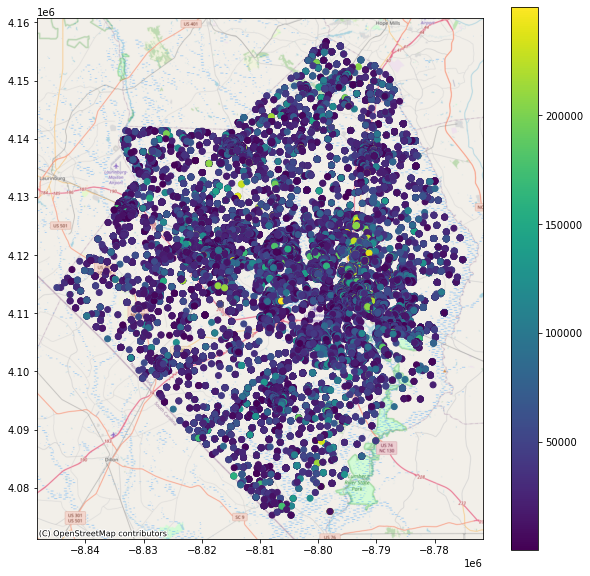

In [30]:
# visualize population
gdf = hua_gdf
map = viz.plot_gdf_map(gdf,column='randincome')
map

In [31]:
medianincome = hua_gdf.randincome.median()
medianincome

29946.0

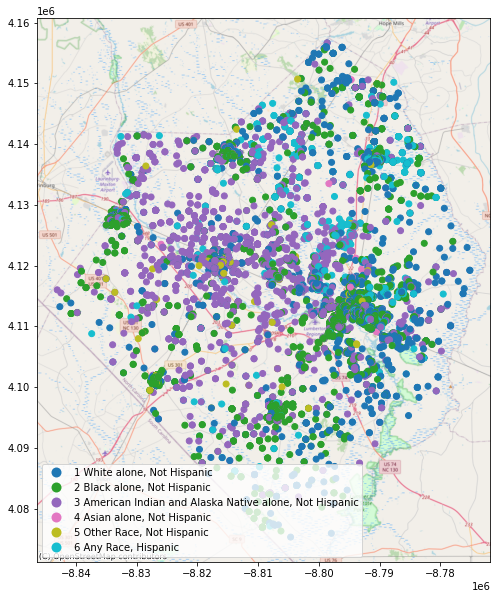

In [32]:
# visualize population by income and tenure status
lowincome_renters_gdf = hua_gdf.loc[(hua_gdf.randincome < medianincome) &
                                    (hua_gdf['Tenure Status'] == '2 Renter Occupied')]
map = viz.plot_gdf_map(lowincome_renters_gdf,column='Race Ethnicity', category=True)
map